# Problem Statement

TripAdvisor aims to enhance user engagement and satisfaction by streamlining the process of finding suitable bars. Current methods require users to sift through extensive lists and reviews, which can be time-consuming and overwhelming. There is also a need to leverage the vast amount of review data to provide actionable insights to users. An intelligent chatbot can resolve these issues by offering personalized bar recommendations based on user preferences extracted from natural language input, thereby improving the decision-making process for users.

### The current problem at hand :

1. Information Overload: Users face a paradox of choice with too many options and reviews to consider.

2. Time-Consuming Process: Finding the right bar involves navigating through filters, reading numerous reviews, and comparing options manually.

3. Underutilized Data: The wealth of review data TripAdvisor possesses is not being actively used to offer personalized, data-driven recommendations.

4. User Engagement: The need to enhance user interaction with the platform, encouraging them to spend more time and return frequently.

5. Monetization Strategy: There is potential for better monetization of the platform by providing targeted advertising and featured listings.


### Benefits of the Solution:

1. Personalization: The chatbot will use natural language processing to understand user queries and preferences, offering a tailored set of recommendations.

2. Efficiency: It streamlines the decision-making process, saving users time by reducing the need to manually filter through options.

3. Data-Driven Insights: Harnessing the power of TripAdvisor's extensive review database, the chatbot can provide more accurate and relevant suggestions.

4. Increased Engagement: An interactive chatbot keeps users on the platform longer and encourages repeat usage.

5. New Revenue Streams: Featured listings and targeted advertising within the chatbot interactions can generate additional income.

6. Competitive Edge: Offering a sophisticated recommendation tool can differentiate TripAdvisor from competitors, positioning it as an innovative leader in travel tech.

7. Scalability: The chatbot can be expanded to other areas such as hotels, restaurants, and activities, making it a comprehensive travel planning tool.

# Vision

The long-term vision for integrating chatbots into TripAdvisor's services is to revolutionize the travel planning experience by creating a seamless, personalized, and interactive user journey. The initial focus on bar recommendations is just the first phase in a strategic roadmap to incorporate artificial intelligence across various travel-related decision-making scenarios. Here's the broader vision:

## Immediate Goals
- Establish a Foundation: Starting with bar recommendations allows TripAdvisor to build a solid foundation for its AI capabilities. It's an opportunity to fine-tune the chatbot technology in a controlled environment before scaling up.
- Learn from User Interactions: Early iterations will gather crucial data on user preferences and interaction patterns, which will be invaluable for enhancing the recommendation algorithms.
- Iterative Improvement: The feedback loop from user interactions will help in continuously refining the chatbot's accuracy and user experience.

## Medium-Term Expansion:
- Restaurant Recommendations: After mastering bar recommendations, the next logical step is to assist users in finding the perfect dining experiences. A restaurant recommendation chatbot would analyze user preferences, dietary restrictions, ambiance choices, and other factors to suggest ideal eateries.
- Accommodation Suggestions: The chatbot could extend to recommending hotels and other forms of accommodation, considering factors like location, amenities, price range, and user reviews.

## Long-Term Vision:
- Comprehensive Trip Planning: Eventually, the chatbot will evolve into a full-fledged virtual travel assistant, capable of curating entire trips based on user input. It would suggest flights, accommodation, dining, and activities, all within the user's budget and preference parameters.
- Integrated Ecosystem: The chatbot will operate within a larger AI ecosystem, connecting with booking systems, calendars, and weather forecasts to provide a holistic travel planning service.
- Enhanced User Profiling: By leveraging machine learning and data analytics, the chatbot will create detailed user profiles to predict future preferences and make proactive suggestions.
- Dynamic Adaptation: The system will dynamically adapt recommendations in real-time based on contextual factors such as weather, location, or even global events.
- Personal Travel Concierge: The ultimate goal is for the chatbot to function as a personal travel concierge, offering end-to-end planning and in-trip assistance, with the ability to make reservations, provide navigation, and even offer language support.

## Strategic Benefits:
- User Retention and Engagement: A chatbot that simplifies trip planning encourages users to return and engage with the platform more deeply and frequently.
- Data Monetization: The insights gained from user interactions can be monetized through targeted advertising, affiliate marketing, and premium service offerings.
- Market Differentiation: By offering a level of personalization and convenience that competitors can't match, TripAdvisor can position itself as a leader in the travel tech industry.
- Scalability and Diversification: This technology is scalable to other markets and sectors within travel, such as cruise planning, adventure tourism, and business travel services.

In summary, the bar recommendation chatbot is just the inception of a transformative journey toward creating a comprehensive, user-centric travel assistant. It's a strategic move to harness the power of AI to enhance the travel planning process, making it more intuitive, efficient, and personalized, which aligns with the evolving needs and expectations of modern travelers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('../data/bars.csv')

In [3]:
# 3. Basic statistics for the "review_rating" column
review_rating_stats = df['review_rating'].describe()
review_rating_stats

count    13619.000000
mean        42.081284
std          7.801939
min         10.000000
25%         35.000000
50%         40.000000
75%         50.000000
max         50.000000
Name: review_rating, dtype: float64

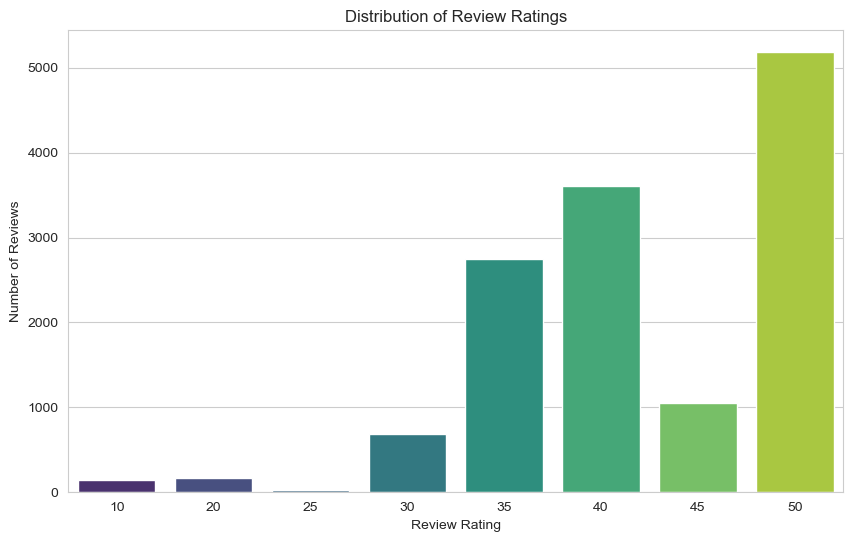

In [4]:
# Setting up the aesthetics
sns.set_style("whitegrid")

# 4. Visualize the distribution of the "review_rating" column
plt.figure(figsize=(10, 6))
sns.countplot(x='review_rating', data=df, palette="viridis")
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Number of Reviews')
plt.show()

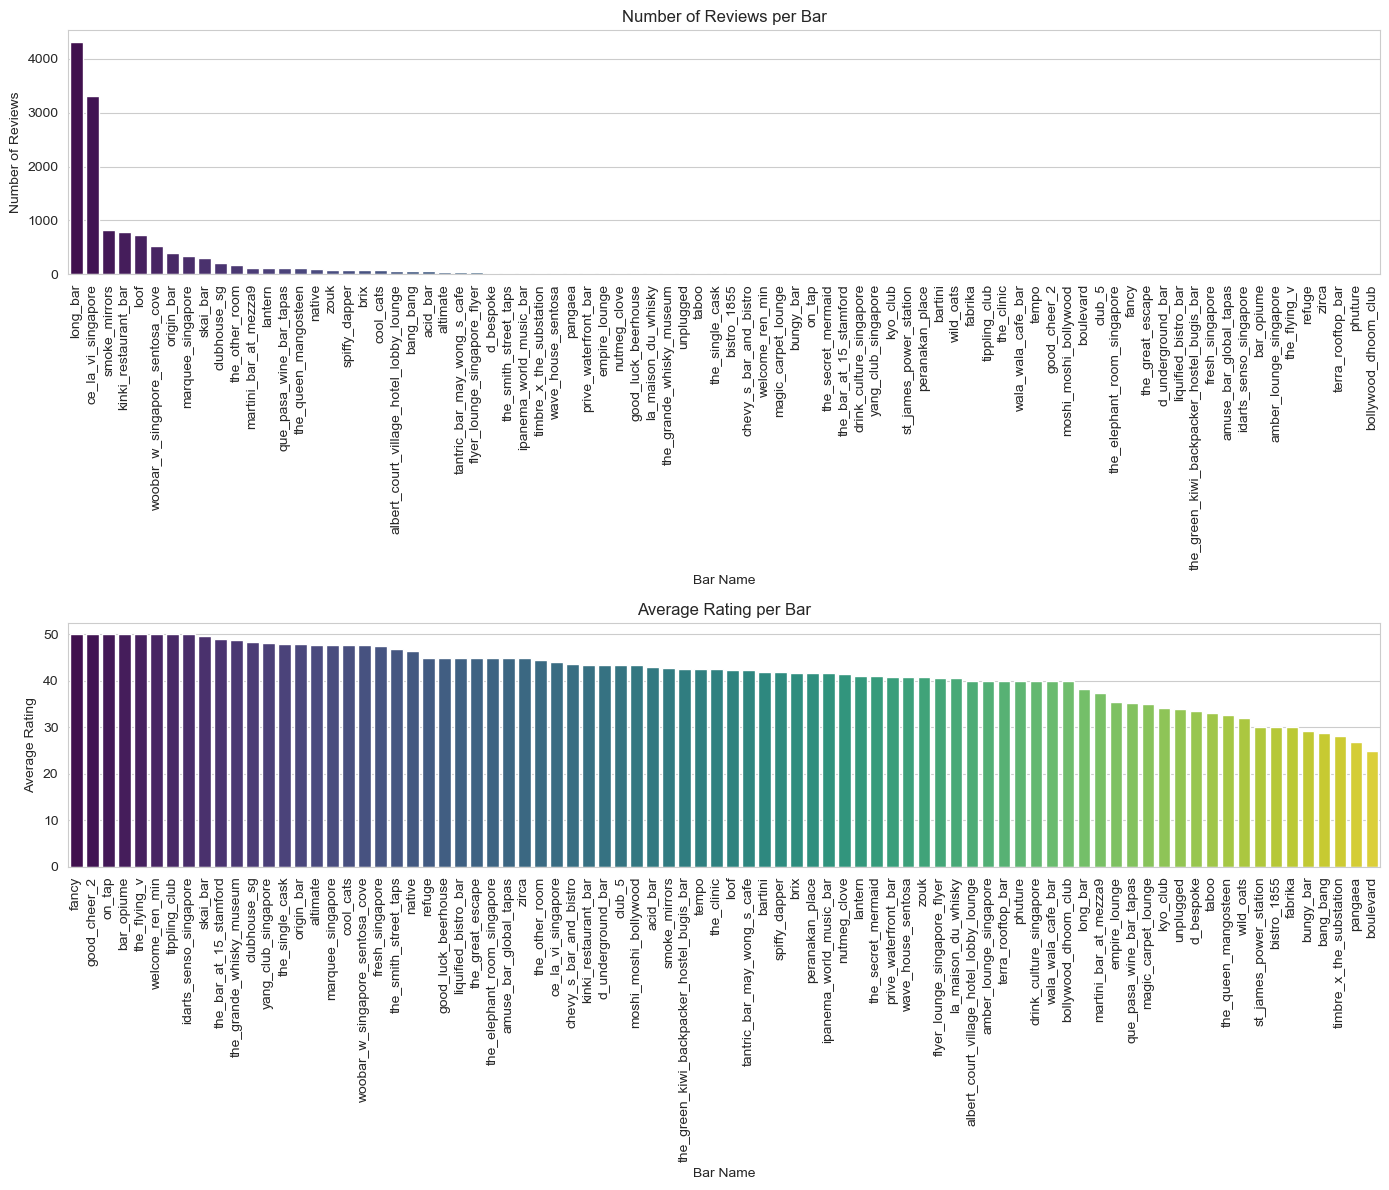

In [5]:
# Number of reviews for each bar
bar_review_counts = df['bar_name'].value_counts()

# Average rating for each bar
bar_avg_rating = df.groupby('bar_name')['review_rating'].mean().sort_values(ascending=False)

# Visualization of the distribution of reviews across different bars
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Bar plot for number of reviews per bar
sns.barplot(x=bar_review_counts.index, y=bar_review_counts.values, ax=ax[0], palette="viridis")
ax[0].set_title('Number of Reviews per Bar')
ax[0].set_xlabel('Bar Name')
ax[0].set_ylabel('Number of Reviews')
ax[0].tick_params(axis='x', rotation=90)

# Bar plot for average rating per bar
sns.barplot(x=bar_avg_rating.index, y=bar_avg_rating.values, ax=ax[1], palette="viridis")
ax[1].set_title('Average Rating per Bar')
ax[1].set_xlabel('Bar Name')
ax[1].set_ylabel('Average Rating')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# The visualizations above display the number of reviews and average ratings for each bar:

1. The first plot shows the distribution of review ratings. We can observe that the majority of the reviews have a rating score between 40-50, indicating that most visitors had very positive experiences at these bars..

The second set of plots provides insights into the number of reviews per bar and the average rating per bar:

1. The top plot displays the count of reviews for each bar, indicating the popularity or user engagement with each establishment.
2. The bottom plot shows the average rating that each bar received, which can be an indicator of the overall customer satisfaction.

In [6]:
# Setting up stopwords
stop_words = set(stopwords.words('english'))

# Extracting positive and negative reviews
positive_reviews = df[df['review_rating'] >= 40]['review_text']
negative_reviews = df[df['review_rating'] < 40]['review_text']

# Tokenize and count words for positive reviews
positive_words = word_tokenize(' '.join(positive_reviews))
positive_words = [word for word in positive_words if word.isalnum() and word not in stop_words]  # filtering
positive_word_counts = Counter(positive_words)

# Tokenize and count words for negative reviews
negative_words = word_tokenize(' '.join(negative_reviews))
negative_words = [word for word in negative_words if word.isalnum() and word not in stop_words]  # filtering
negative_word_counts = Counter(negative_words)

# Getting the most common words for both positive and negative reviews
top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)

top_positive_words

[('experience', 4996),
 ('bar', 4904),
 ('time', 4881),
 ('us', 4424),
 ('singapore', 4060),
 ('thank', 3430),
 ('great', 3350),
 ('back', 3312),
 ('service', 2945),
 ('dear', 2921),
 ('place', 2618),
 ('good', 2534),
 ('drinks', 2521),
 ('forward', 2513),
 ('look', 2358),
 ('club', 2176),
 ('much', 2029),
 ('view', 2005),
 ('regards', 2000),
 ('welcoming', 1840)]

## Word Analysis (Positive >40)

1. Based on the word analysis, it is found that common words such as experience, bar, great and service are commonly found in reviews.

2. This shows us that when patrons visits establishments like these, they often look for these attritbutes. Attributes like good food and service informs them whether if they will have a good time upon visiting these establishments. 

3. From this analysis, we are able to better give suggestions via the chatbox when users want to find out where should they spend their night.

In [7]:
top_negative_words

[('singapore', 4747),
 ('bar', 3978),
 ('sling', 2628),
 ('long', 2278),
 ('raffles', 1654),
 ('place', 1430),
 ('hotel', 1392),
 ('experience', 1304),
 ('drink', 1172),
 ('service', 1145),
 ('floor', 1132),
 ('drinks', 1118),
 ('great', 1059),
 ('one', 1050),
 ('visit', 1026),
 ('shells', 967),
 ('time', 952),
 ('good', 928),
 ('go', 874),
 ('us', 865)]

## Word Analysis (Negative <40)

1. Interestingly, many words overlap with those from positive reviews. However, the context in which these words are used might differ. For instance, a negative review might mention "good" in a comparative sense (eg., "not as good") 

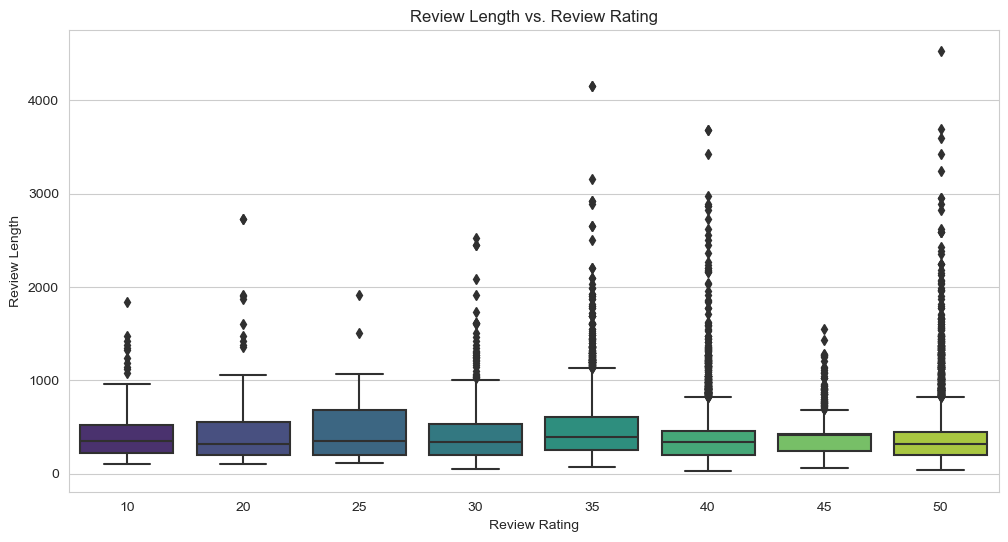

In [8]:
# Calculate review length
df['review_length'] = df['review_text'].apply(len)

# Visualize the relationship between review length and review rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_rating', y='review_length', data=df, palette="viridis")
plt.title('Review Length vs. Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Review Length')
plt.show()

### The boxplot above visualizes the relationship between review length and review rating. Here are some insights:

1. Reviews with higher ratings tend to have a more compact interquartile range of lengths, especially for ratings of 40 and above.

2. The median review length does not seem to vary significantly with the rating, although there is a slight increase in length for the highest rating (50).

3. There are outliers across all rating categories, indicating that some reviews are significantly longer than the average.

4. These observations can suggest that while customer satisfaction (as indicated by higher ratings) does not necessarily result in longer reviews, very positive experiences might prompt some users to leave more detailed feedback.

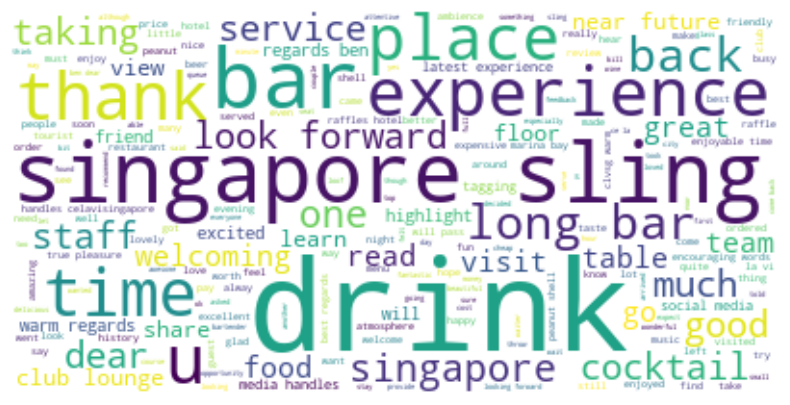

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure the DataFrame is named 'df' and has been loaded correctly with the 'review_text' column
text = " ".join(review for review in df['review_text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Word Cloud Analysis

The word cloud generated from the bar reviews is a visual representation of word frequency within the dataset. It's a useful tool in text analysis as it quickly highlights the most prominent terms in a collection of text. Here’s a comprehensive explanation of the insights we might glean from the word cloud created from the bar reviews dataset:

1. Most Prominent Words:
The largest words in the cloud, such as "bar", "Singapore", "experience", and "service", are those that appear most frequently in the reviews. Their prominence suggests these are key factors that reviewers are focusing on when describing their experiences.

2. Quality of Experience:
Words like "great", "good", "best", and "experience" suggest that reviewers often discuss the quality of their experience. Positive adjectives point to what aspects of the bar experience are appreciated by patrons.

3. Service and Staff:
The frequent appearance of "service" and "staff" implies that the level of service is a common point of discussion, possibly a significant factor in the patrons' overall satisfaction.

4. Atmosphere:
Terms such as "place", "atmosphere", and "music" might be common when reviewers are describing the ambiance of the bars.

# Bi-Grams & Tri-Grams

1. We're doing this because in Natural Language Processing(NLP), the human language is complex and often relies on the combination of words to convey precise meanings. Bi-grams and tri-grams capture these combinations and can be important features for NLP tasks like sentiment analysis, machine translation, or text classification.

2. Understanding customer sentiments in reviews can be complex and may be lost when looking at individual words. Phrases like "not good," "really enjoyed," or "highly recommend" provide a clearer picture of the customer's feelings. Bi-grams and tri-grams capture these nuances better than individual words.

3. When identifying popular Items or attractions, Customers often mention menu items, drinks, or specific attractions using two or three words. For instance, "Singapore Sling," "chicken wings," or "rooftop view." This can highlight popular items that may be drawing customers to the bars.

4. References to staff interactions often involve several words, such as "friendly service," "attentive bartender," or "great host." Bi-grams and tri-grams can help in assessing the quality of service that is being discussed in the reviews.

5. Marketing and Branding Insights: Frequent mention of certain phrases can inform the bar's marketing and branding strategy. For example, if "cozy atmosphere" is a common bi-gram, the bar might use this in their promotional materials to attract customers looking for a cozy place to relax.

6. Operational Insights: Some phrases might relate to the operational aspects of the bar, such as "quick service," "table reservation," or "crowd management." These insights can help bar owners make data-driven decisions to improve the customer experience.


In [10]:
# Function to get top n-grams
def get_top_n_grams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 10 bi-grams
top_bi_grams = get_top_n_grams(df['review_text'], n=10, ngram_range=(2, 2))

# Get the top 10 tri-grams
top_tri_grams = get_top_n_grams(df['review_text'], n=10, ngram_range=(3, 3))

top_bi_grams, top_tri_grams


([('singapore sling', 3411),
  ('long bar', 2996),
  ('look forward', 2186),
  ('taking time', 1856),
  ('forward welcoming', 1809),
  ('thank taking', 1780),
  ('club lounge', 1634),
  ('near future', 1608),
  ('warm regards', 1442),
  ('pleasure read', 1392)],
 [('thank taking time', 1774),
  ('look forward welcoming', 1705),
  ('welcoming near future', 1382),
  ('experience club lounge', 1382),
  ('forward welcoming near', 1381),
  ('warm regards ben', 1368),
  ('taking time highlight', 1364),
  ('time highlight latest', 1364),
  ('highlight latest experience', 1364),
  ('pleasure read excited', 1361)])

# Insights into Customer Preferences and Bar Experiences in Singapore

In the vibrant cityscape of Singapore, bars offer a multitude of experiences, from high-energy dance floors to quiet spots for a relaxing drink. This analysis aims to delve into customer reviews to extract meaningful insights that can inform both consumers and business owners.

The current method of selecting a bar, based on lengthy reviews and ratings, can be overwhelming for customers. Business owners, on the other hand, often struggle to pinpoint what drives customer satisfaction and loyalty. Through this EDA, we seek to understand the nuances of customer feedback, identify key themes in their experiences, and discover what truly matters to patrons of Singapore's diverse bar scene.

We have identified three primary aspects to focus on in our analysis:

1. Customer Satisfaction: By analyzing review ratings, we aim to gauge the overall satisfaction level and identify any prevalent issues or standout features that are impacting customer experiences.

2. Service Quality: Through examining textual reviews, we aim to understand how service quality influences customer perceptions and identify areas of improvement or excellence.

3. Atmospheric and Experiential Elements: We will explore mentions of ambiance, music, and other experiential factors to see how they contribute to the overall allure of a bar.

This dataset comprises detailed customer reviews but does not directly measure the specific attributes that contribute to a bar's popularity or customer satisfaction. To bridge this gap, we have conducted a thorough analysis of the language used in reviews. This analysis includes looking at common unigrams, bi-grams, and tri-grams to capture the essence of customer feedback. Additionally, we have leveraged statistical methods to comprehend the distribution and impact of ratings.

Moving forward, the EDA will prioritize extracting themes related to customer satisfaction, service quality, and atmosphere. The findings will culminate in actionable recommendations for both bar-goers in search of their ideal night out and bar owners looking to enhance their establishment's appeal. We will also consider how these insights can translate into a more efficient and engaging user interface on platforms like TripAdvisor, ultimately benefiting the entire ecosystem of nightlife in Singapore.

References to the methodologies and secondary research findings will be provided at the conclusion of this analysis, ensuring transparency and the opportunity for further academic or commercial exploration.

This description outlines the goals and scope of this EDA within the context of the dataset. It also hints at the methods used and the expected outcomes, setting the stage for detailed analysis and recommendations based on the data we have scraped from TripAdvisor website.